In [2]:
import pandas as pd
import plotly.express as px
import requests
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl
from statsmodels.base.transform import BoxCox
from prophet import Prophet
import yfinance as yf

In [286]:
# Define the Bitcoin ticker symbol on Yahoo Finance
btc_ticker = "BTC-USD"

# Fetch historical data for Bitcoin
# You can specify the period ('1d', '5d', '1mo', '1y', 'max') or date range (start/end)
btc_data = yf.download(btc_ticker, period="max", interval="1d")  # 1 year of daily data

[*********************100%***********************]  1 of 1 completed


In [123]:
btc_data

,Date,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-11-06 00:00:00+00:00,75639.078125,75639.078125,76460.156250,69322.031250,69358.500000,118592653963
2024-11-07 00:00:00+00:00,75904.859375,75904.859375,76943.117188,74480.421875,75637.085938,63467654989
2024-11-08 00:00:00+00:00,76545.476562,76545.476562,77252.750000,75648.742188,75902.835938,55176858003


In [124]:
# Display the data
btc_data.to_csv("bitcoin_data.csv")

In [38]:
df = pd.read_csv("C:/Users/Srnzzz/Documents/5- Ironhack/Dash/bitcoin_data_no_eco.csv", delimiter=';')
# Convert the Date column to datetime format without specifying `format`
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date in ascending order
df = df.sort_values(by='Date')

df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [39]:
df.reset_index(inplace=True)
df.rename(columns={'Date': 'Day'}, inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)
df

,Date,Day,Close,High,Low,Open,Volume
0,0,2014-09-17 00:00:00+00:00,457.334015,468.174011,452.421997,465.864014,2.105680e+07
1,1,2014-09-18 00:00:00+00:00,424.440002,456.859985,413.104004,456.859985,3.448320e+07
2,2,2014-09-19 00:00:00+00:00,394.795990,427.834992,384.532013,424.102997,3.791970e+07
3,3,2014-09-20 00:00:00+00:00,408.903992,423.295990,389.882996,394.673004,3.686360e+07
4,4,2014-09-21 00:00:00+00:00,398.821014,412.425995,393.181000,408.084992,2.658010e+07
...,...,...,...,...,...,...,...
3705,3705,2024-11-08 00:00:00+00:00,76545.476560,77252.750000,75648.742190,75902.835940,5.517686e+10
3706,3706,2024-11-09 00:00:00+00:00,76778.867190,76932.765630,75773.789060,76556.187500,2.900948e+10
3707,3707,2024-11-10 00:00:00+00:00,80474.187500,81474.421880,76565.429690,76775.546880,8.257059e+10
3708,3708,2024-11-11 00:00:00+00:00,88701.484380,89604.500000,80283.250000,80471.414060,1.179670e+11


<h3>EDA</h3>

C:\Users\Srnzzz\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



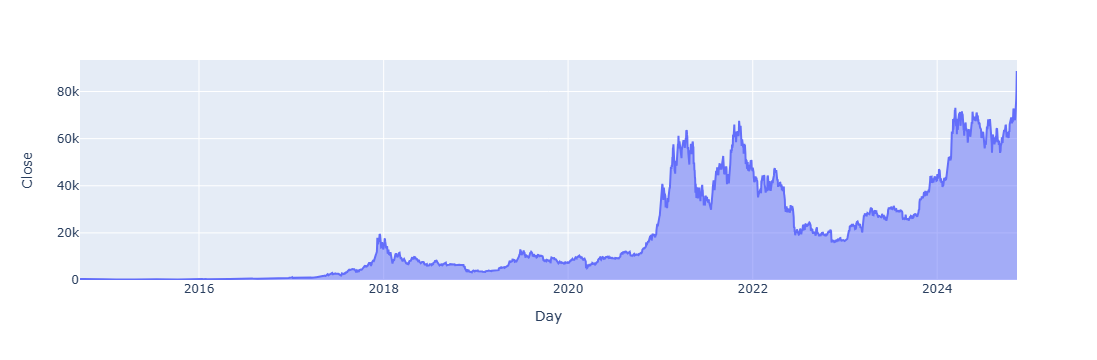

In [40]:
px.area(df, x='Day', y='Close')

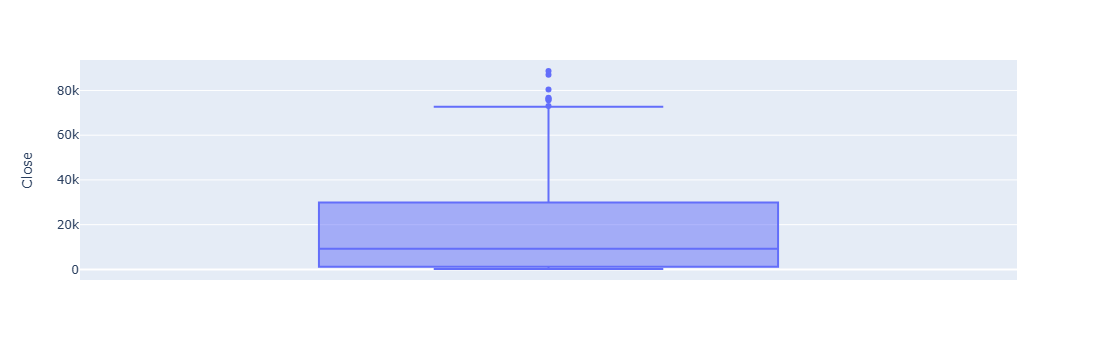

In [41]:
px.box(df, y='Close')

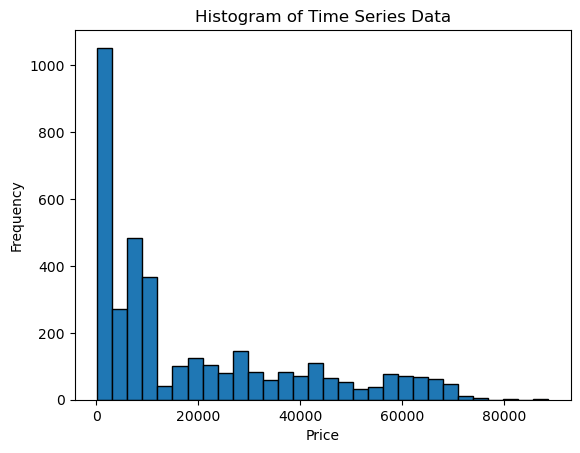

In [42]:
import matplotlib.pyplot as plt

# Assuming your time series data is in a DataFrame called `df` and the column is 'value'
plt.hist(df['Close'], bins=30, edgecolor='black')
plt.title("Histogram of Time Series Data")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

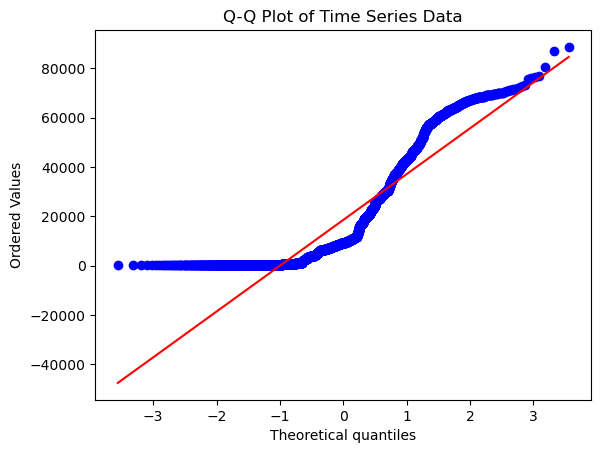

In [43]:
import scipy.stats as stats
# Q-Q plot
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Time Series Data")
plt.show()

<h3>Box Cox Data Transformation
https://builtin.com/data-science/box-cox-transformation-target-variable
</h3>

C:\Users\Srnzzz\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



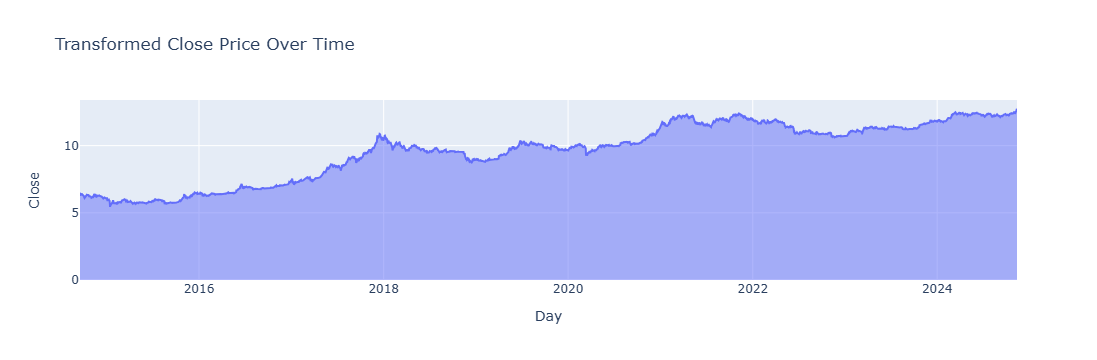

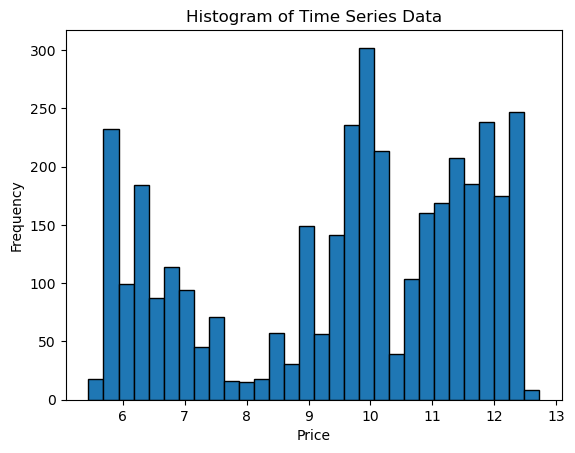

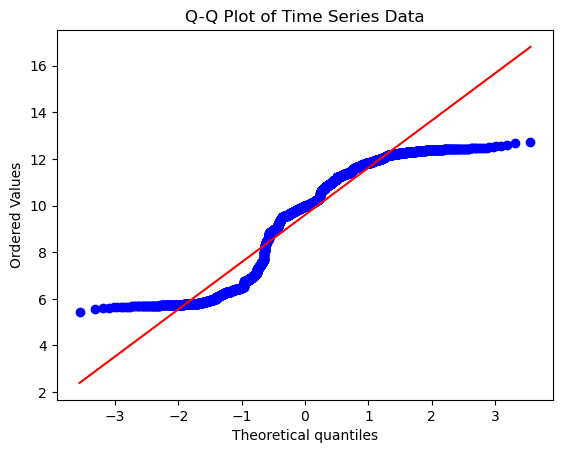

In [44]:
bc= BoxCox()
df_box = df["Close"], lmbda =bc.transform_boxcox(df["Close"])
# Ensure the data frame contains an appropriate time-related index
df['Day'] = pd.date_range(start='17/9/2014', periods=len(df), freq='D')  # Example date range

# Plot the transformed 'Close' values
fig = px.area(df, x='Day', y='Close', title="Transformed Close Price Over Time")
fig.show()

plt.hist(df['Close'], bins=30, edgecolor='black')
plt.title("Histogram of Time Series Data")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

stats.probplot(df['Close'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Time Series Data")
plt.show()

<h3>Change of Variables</h3>
<h5>The input to Prophet is always a dataframe with two columns: ds and y.</h5>

In [45]:
# Took the data from transformed Box Cox Transformation
data = df[["Day", "Close"]]
data.columns=["ds", "y"]
data

,ds,y
0,2014-09-17,6.497709
1,2014-09-18,6.413872
2,2014-09-19,6.332666
3,2014-09-20,6.372033
4,2014-09-21,6.344037
...,...,...
3705,2024-11-08,12.543184
3706,2024-11-09,12.546957
3707,2024-11-10,12.605243
3708,2024-11-11,12.726105


<h3>Trend, Multi-Seasonal Decomposition & Forecast / Model Fit</h3>

In [46]:
## Creating model parameters
model_param ={
    "daily_seasonality": False,
    "weekly_seasonality":False,
    "yearly_seasonality":True,
    "seasonality_mode": "multiplicative",
    "growth": "logistic",
    'changepoint_prior_scale': 0.05,   # Smaller values (e.g., 0.001, 0.005) make the model less sensitive to sudden trend changes,
    'seasonality_prior_scale': 10   
}

In [47]:
## Creating Model
model = Prophet(**model_param)

# Setting a cap or upper limit for the forecast as we are using logistics growth
# The cap will be maximum value of target variable plus 5% of std.
data['cap']= data["y"].max() + data["y"].std() * 0.5

data

C:\Users\Srnzzz\AppData\Local\Temp\ipykernel_14580\2871225680.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,cap
0,2014-09-17,6.497709,13.788939
1,2014-09-18,6.413872,13.788939
2,2014-09-19,6.332666,13.788939
3,2014-09-20,6.372033,13.788939
4,2014-09-21,6.344037,13.788939
...,...,...,...
3705,2024-11-08,12.543184,13.788939
3706,2024-11-09,12.546957,13.788939
3707,2024-11-10,12.605243,13.788939
3708,2024-11-11,12.726105,13.788939


<h3>Plotting the trend, yearly seasonality, and forecast
</h3>

<h3>Adding monthly/quarterly seasonality and economic events</h3>

In [48]:
# Create a copy to avoid the SettingWithCopyWarning
data = data.copy()
data['ds'] = pd.to_datetime(data['ds']).dt.tz_localize(None)

12:11:23 - cmdstanpy - INFO - Chain [1] start processing
12:11:28 - cmdstanpy - INFO - Chain [1] done processing


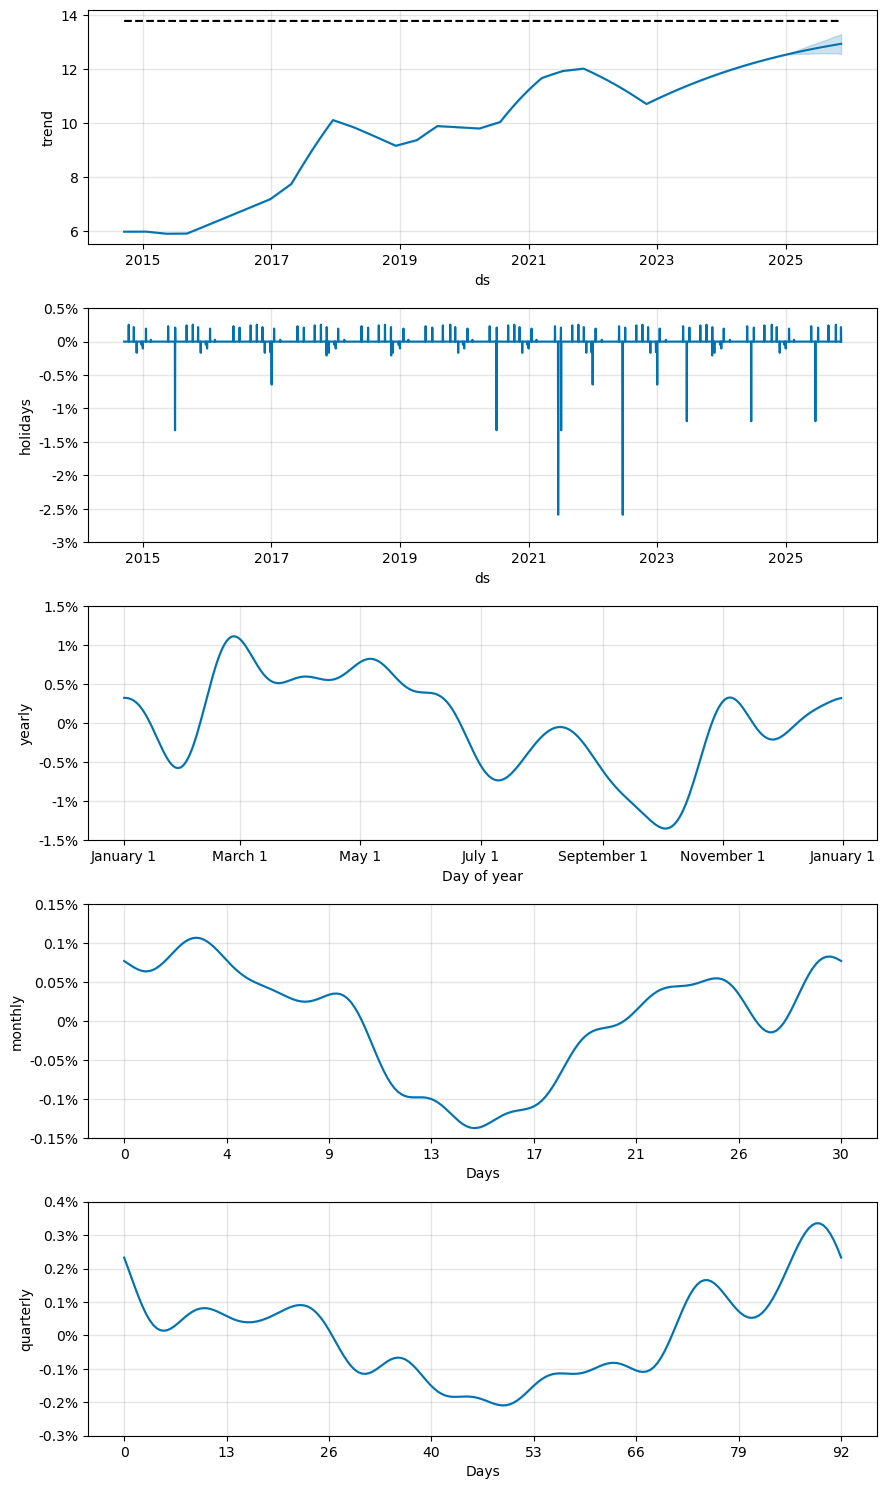

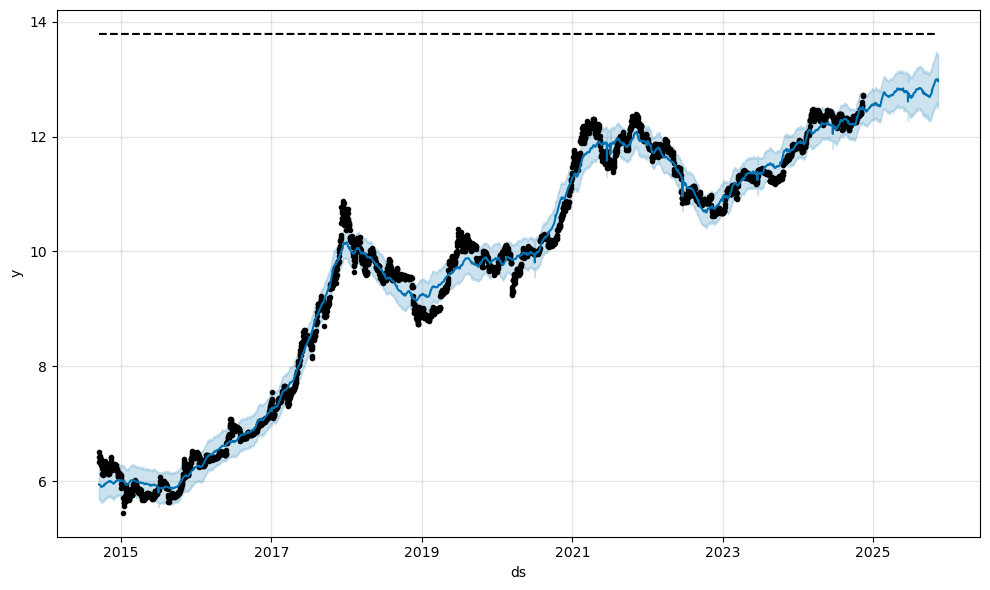

In [49]:
model = Prophet(**model_param)

model= model.add_seasonality(name="monthly", period=30, fourier_order=10)
model= model.add_seasonality(name="quarterly", period=92.25, fourier_order=10)


model.add_country_holidays("US") # here add economic events

model.fit(data)

# Create future dataframe
future= model.make_future_dataframe(periods=365)
future['cap'] = data['cap'].max()

forecast= model.predict(future)

model.plot_components(forecast);
model.plot(forecast);

In [50]:
forecast

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,...,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-09-17,5.983006,13.788939,5.673229,6.205527,5.983006,5.983006,0.0,0.0,0.0,...,0.002087,0.002087,0.002087,-0.010478,-0.010478,-0.010478,0.0,0.0,0.0,5.939178
1,2014-09-18,5.983064,13.788939,5.678184,6.199271,5.983064,5.983064,0.0,0.0,0.0,...,0.002595,0.002595,0.002595,-0.010714,-0.010714,-0.010714,0.0,0.0,0.0,5.939705
2,2014-09-19,5.983122,13.788939,5.688549,6.200271,5.983122,5.983122,0.0,0.0,0.0,...,0.003023,0.003023,0.003023,-0.010952,-0.010952,-0.010952,0.0,0.0,0.0,5.939138
3,2014-09-20,5.983180,13.788939,5.686116,6.191394,5.983180,5.983180,0.0,0.0,0.0,...,0.003295,0.003295,0.003295,-0.011192,-0.011192,-0.011192,0.0,0.0,0.0,5.938475
4,2014-09-21,5.983239,13.788939,5.664154,6.201111,5.983239,5.983239,0.0,0.0,0.0,...,0.003351,0.003351,0.003351,-0.011434,-0.011434,-0.011434,0.0,0.0,0.0,5.936584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,2025-11-08,12.936644,13.788939,12.560705,13.413245,12.571771,13.287251,0.0,0.0,0.0,...,0.000204,0.000204,0.000204,0.002868,0.002868,0.002868,0.0,0.0,0.0,12.982088
4071,2025-11-09,12.937712,13.788939,12.534869,13.431183,12.570004,13.289727,0.0,0.0,0.0,...,0.000143,0.000143,0.000143,0.002618,0.002618,0.002618,0.0,0.0,0.0,12.979703
4072,2025-11-10,12.938778,13.788939,12.550818,13.426795,12.568312,13.292198,0.0,0.0,0.0,...,0.000243,0.000243,0.000243,0.002323,0.002323,0.002323,0.0,0.0,0.0,12.978912
4073,2025-11-11,12.939843,13.788939,12.548734,13.450076,12.567029,13.294665,0.0,0.0,0.0,...,0.000430,0.000430,0.000430,0.001990,0.001990,0.001990,0.0,0.0,0.0,13.001943


<h3>Accuracy Testing</h3>

In [35]:
from prophet.diagnostics import cross_validation, performance_metrics

# Perform cross-validation with initial 365 days for the first training data and the cut-off for every 180 days.

df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')

# Calculate evaluation metrics
res = performance_metrics(df_cv)

res

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/17 [00:00<?, ?it/s]

09:53:25 - cmdstanpy - INFO - Chain [1] start processing
09:53:25 - cmdstanpy - INFO - Chain [1] done processing
09:53:26 - cmdstanpy - INFO - Chain [1] start processing
09:53:26 - cmdstanpy - INFO - Chain [1] done processing
09:53:27 - cmdstanpy - INFO - Chain [1] start processing
09:53:27 - cmdstanpy - INFO - Chain [1] done processing
09:53:28 - cmdstanpy - INFO - Chain [1] start processing
09:53:29 - cmdstanpy - INFO - Chain [1] done processing
09:53:29 - cmdstanpy - INFO - Chain [1] start processing
09:53:30 - cmdstanpy - INFO - Chain [1] done processing
09:53:31 - cmdstanpy - INFO - Chain [1] start processing
09:53:32 - cmdstanpy - INFO - Chain [1] done processing
09:53:33 - cmdstanpy - INFO - Chain [1] start processing
09:53:34 - cmdstanpy - INFO - Chain [1] done processing
09:53:35 - cmdstanpy - INFO - Chain [1] start processing
09:53:37 - cmdstanpy - INFO - Chain [1] done processing
09:53:38 - cmdstanpy - INFO - Chain [1] start processing
09:53:40 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.372973,0.610715,0.516174,0.051401,0.048427,0.051165,0.126376
1,38 days,0.382623,0.618565,0.523335,0.052161,0.048688,0.051921,0.119924
2,39 days,0.391106,0.625384,0.528812,0.052773,0.048960,0.052531,0.116793
3,40 days,0.400194,0.632609,0.534574,0.053401,0.049245,0.053157,0.116793
4,41 days,0.409582,0.639986,0.540262,0.054011,0.049872,0.053766,0.114326
...,...,...,...,...,...,...,...,...
324,361 days,2.945820,1.716339,1.538301,0.149633,0.135192,0.148190,0.290892
325,362 days,2.974614,1.724707,1.544299,0.150265,0.135192,0.148715,0.290892
326,363 days,3.003519,1.733066,1.550285,0.150899,0.134643,0.149240,0.291746
327,364 days,3.035541,1.742281,1.556944,0.151582,0.134583,0.149817,0.292505


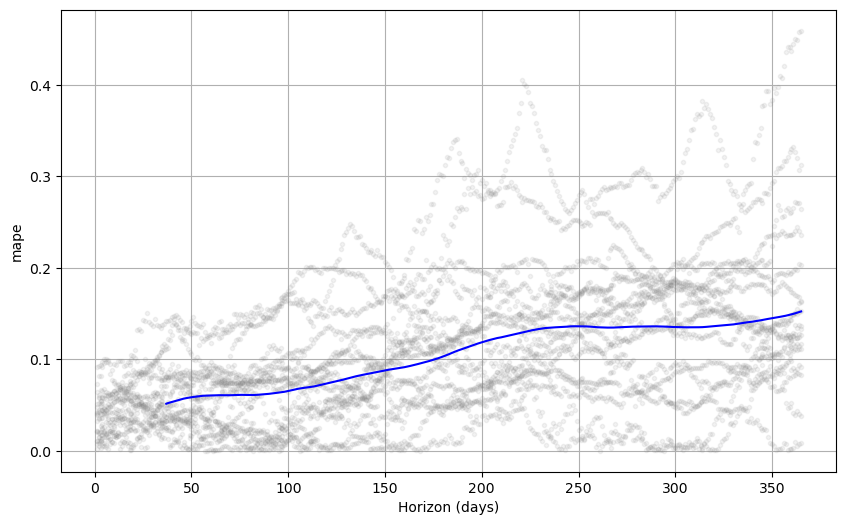

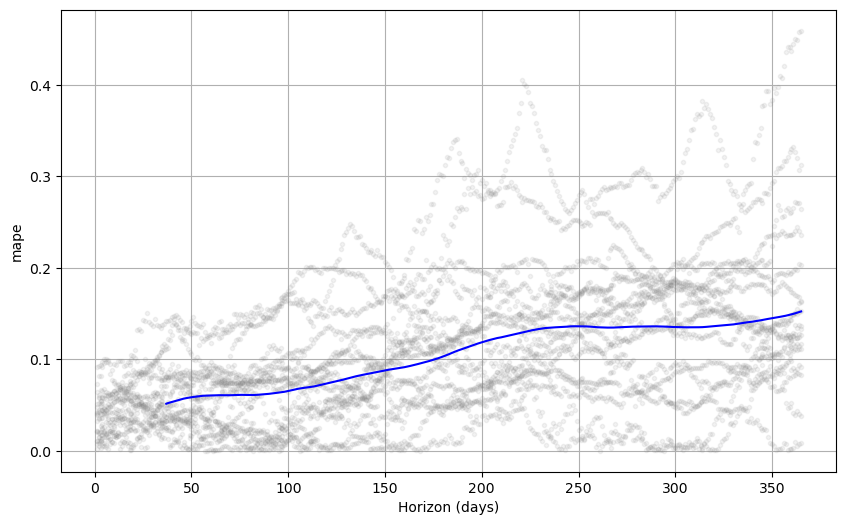

In [36]:
from prophet.plot import plot_cross_validation_metric
#choose between 'mse', 'rmse', 'mae', 'mape', 'coverage'

plot_cross_validation_metric(df_cv, metric= 'mape')

<Axes: xlabel='ds'>

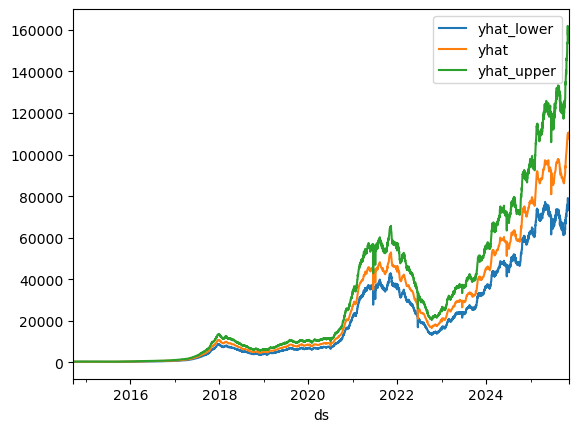

In [51]:
forecast["yhat"]=bc.untransform_boxcox(x=forecast["yhat"], lmbda=lmbda)
forecast["yhat_lower"]=bc.untransform_boxcox(x=forecast["yhat_lower"], lmbda=lmbda)
forecast["yhat_upper"]=bc.untransform_boxcox(x=forecast["yhat_upper"], lmbda=lmbda)
forecast.plot(x="ds", y=["yhat_lower", "yhat", "yhat_upper"])

In [53]:
forecast.to_csv("bitcoin_update_use.csv")

<h3>Hyper-Parameter Tuning</h3>

In [15]:
## Hyper parameter Tuning
import itertools
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics


param_grid={
    "daily_seasonality": [False],
    "weekly_seasonality":[False],
    "yearly_seasonality":[True],
    "growth": ["logistic"],
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.1, 0.5], # to give higher value to prior trend
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0] # to control the flexibility of seasonality components
}

# Generate all combination of parameters
all_params= [
            dict(zip(param_grid.keys(), v))
            for v in itertools.product(*param_grid.values())
]

print(all_params)

[{'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.005, 'seasonality_prior_scale': 0.01}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_

In [16]:
# Adding seasonality, US events and finding the best hyper-parameters
rmses= list ()

# go through each combinations
for params in all_params:
    m= Prophet(**params)
    
    m= m.add_seasonality(name= 'monthly', period=15, fourier_order=5)
    m= m.add_seasonality(name= "quarterly", period= 30, fourier_order= 10)
    # m.add_country_holidays(country_name="US")
    
    m.fit(data)
    

    df_cv= cross_validation(m, initial="365 days", period="30 days", horizon="365 days")
                            
    df_p= performance_metrics(df_cv, rolling_window=1)
                            
    rmses.append(df_p['rmse'].values[0])
                            
# find teh best parameters
best_params = all_params[np.argmin(rmses)]
                            
print("\n The best parameters are:", best_params) 

forecast.head()

12:10:57 - cmdstanpy - INFO - Chain [1] start processing
12:10:57 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/100 [00:00<?, ?it/s]

12:10:58 - cmdstanpy - INFO - Chain [1] start processing
12:10:58 - cmdstanpy - INFO - Chain [1] done processing
12:10:58 - cmdstanpy - INFO - Chain [1] start processing
12:10:58 - cmdstanpy - INFO - Chain [1] done processing
12:10:59 - cmdstanpy - INFO - Chain [1] start processing
12:10:59 - cmdstanpy - INFO - Chain [1] done processing
12:10:59 - cmdstanpy - INFO - Chain [1] start processing
12:10:59 - cmdstanpy - INFO - Chain [1] done processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:00 - cmdstanpy - INFO - Chain [1] done processing
12:11:00 - cmdstanpy - INFO - Chain [1] start processing
12:11:01 - cmdstanpy - INFO - Chain [1] done processing
12:11:01 - cmdstanpy - INFO - Chain [1] start processing
12:11:01 - cmdstanpy - INFO - Chain [1] done processing
12:11:02 - cmdstanpy - INFO - Chain [1] start processing
12:11:02 - cmdstanpy - INFO - Chain [1] done processing
12:11:02 - cmdstanpy - INFO - Chain [1] start processing
12:11:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

12:15:17 - cmdstanpy - INFO - Chain [1] start processing
12:15:17 - cmdstanpy - INFO - Chain [1] done processing
12:15:17 - cmdstanpy - INFO - Chain [1] start processing
12:15:18 - cmdstanpy - INFO - Chain [1] done processing
12:15:18 - cmdstanpy - INFO - Chain [1] start processing
12:15:18 - cmdstanpy - INFO - Chain [1] done processing
12:15:19 - cmdstanpy - INFO - Chain [1] start processing
12:15:19 - cmdstanpy - INFO - Chain [1] done processing
12:15:19 - cmdstanpy - INFO - Chain [1] start processing
12:15:19 - cmdstanpy - INFO - Chain [1] done processing
12:15:20 - cmdstanpy - INFO - Chain [1] start processing
12:15:20 - cmdstanpy - INFO - Chain [1] done processing
12:15:21 - cmdstanpy - INFO - Chain [1] start processing
12:15:21 - cmdstanpy - INFO - Chain [1] done processing
12:15:21 - cmdstanpy - INFO - Chain [1] start processing
12:15:21 - cmdstanpy - INFO - Chain [1] done processing
12:15:22 - cmdstanpy - INFO - Chain [1] start processing
12:15:22 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

12:19:56 - cmdstanpy - INFO - Chain [1] start processing
12:19:57 - cmdstanpy - INFO - Chain [1] done processing
12:19:57 - cmdstanpy - INFO - Chain [1] start processing
12:19:57 - cmdstanpy - INFO - Chain [1] done processing
12:19:58 - cmdstanpy - INFO - Chain [1] start processing
12:19:58 - cmdstanpy - INFO - Chain [1] done processing
12:19:58 - cmdstanpy - INFO - Chain [1] start processing
12:19:58 - cmdstanpy - INFO - Chain [1] done processing
12:19:59 - cmdstanpy - INFO - Chain [1] start processing
12:19:59 - cmdstanpy - INFO - Chain [1] done processing
12:19:59 - cmdstanpy - INFO - Chain [1] start processing
12:20:00 - cmdstanpy - INFO - Chain [1] done processing
12:20:00 - cmdstanpy - INFO - Chain [1] start processing
12:20:00 - cmdstanpy - INFO - Chain [1] done processing
12:20:01 - cmdstanpy - INFO - Chain [1] start processing
12:20:01 - cmdstanpy - INFO - Chain [1] done processing
12:20:01 - cmdstanpy - INFO - Chain [1] start processing
12:20:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

12:24:17 - cmdstanpy - INFO - Chain [1] start processing
12:24:18 - cmdstanpy - INFO - Chain [1] done processing
12:24:18 - cmdstanpy - INFO - Chain [1] start processing
12:24:18 - cmdstanpy - INFO - Chain [1] done processing
12:24:19 - cmdstanpy - INFO - Chain [1] start processing
12:24:19 - cmdstanpy - INFO - Chain [1] done processing
12:24:19 - cmdstanpy - INFO - Chain [1] start processing
12:24:19 - cmdstanpy - INFO - Chain [1] done processing
12:24:20 - cmdstanpy - INFO - Chain [1] start processing
12:24:20 - cmdstanpy - INFO - Chain [1] done processing
12:24:20 - cmdstanpy - INFO - Chain [1] start processing
12:24:20 - cmdstanpy - INFO - Chain [1] done processing
12:24:21 - cmdstanpy - INFO - Chain [1] start processing
12:24:21 - cmdstanpy - INFO - Chain [1] done processing
12:24:22 - cmdstanpy - INFO - Chain [1] start processing
12:24:22 - cmdstanpy - INFO - Chain [1] done processing
12:24:23 - cmdstanpy - INFO - Chain [1] start processing
12:24:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

12:29:02 - cmdstanpy - INFO - Chain [1] start processing
12:29:02 - cmdstanpy - INFO - Chain [1] done processing
12:29:03 - cmdstanpy - INFO - Chain [1] start processing
12:29:03 - cmdstanpy - INFO - Chain [1] done processing
12:29:03 - cmdstanpy - INFO - Chain [1] start processing
12:29:04 - cmdstanpy - INFO - Chain [1] done processing
12:29:04 - cmdstanpy - INFO - Chain [1] start processing
12:29:04 - cmdstanpy - INFO - Chain [1] done processing
12:29:05 - cmdstanpy - INFO - Chain [1] start processing
12:29:05 - cmdstanpy - INFO - Chain [1] done processing
12:29:05 - cmdstanpy - INFO - Chain [1] start processing
12:29:06 - cmdstanpy - INFO - Chain [1] done processing
12:29:06 - cmdstanpy - INFO - Chain [1] start processing
12:29:06 - cmdstanpy - INFO - Chain [1] done processing
12:29:07 - cmdstanpy - INFO - Chain [1] start processing
12:29:07 - cmdstanpy - INFO - Chain [1] done processing
12:29:08 - cmdstanpy - INFO - Chain [1] start processing
12:29:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

12:33:48 - cmdstanpy - INFO - Chain [1] start processing
12:33:48 - cmdstanpy - INFO - Chain [1] done processing
12:33:49 - cmdstanpy - INFO - Chain [1] start processing
12:33:49 - cmdstanpy - INFO - Chain [1] done processing
12:33:49 - cmdstanpy - INFO - Chain [1] start processing
12:33:49 - cmdstanpy - INFO - Chain [1] done processing
12:33:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:33:49 - cmdstanpy - INFO - Chain [1] start processing
12:33:57 - cmdstanpy - INFO - Chain [1] done processing
12:33:58 - cmdstanpy - INFO - Chain [1] start processing
12:33:58 - cmdstanpy - INFO - Chain [1] done processing
12:33:58 - cmdstanpy - INFO - Chain [1] start processing
12:33:59 - cmdstanpy - INFO - Chain [1] done processing
12:33:59 - cmdstanpy - INFO - Chain [1] start processing
12:33:59 - cmdstanpy - INFO - Chain [1] done processing
12:34:00 - cmdstanpy - INFO - Chain [1] start process

  0%|          | 0/100 [00:00<?, ?it/s]

12:39:08 - cmdstanpy - INFO - Chain [1] start processing
12:39:08 - cmdstanpy - INFO - Chain [1] done processing
12:39:08 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing
12:39:09 - cmdstanpy - INFO - Chain [1] start processing
12:39:09 - cmdstanpy - INFO - Chain [1] done processing
12:39:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:39:09 - cmdstanpy - INFO - Chain [1] start processing
12:39:16 - cmdstanpy - INFO - Chain [1] done processing
12:39:16 - cmdstanpy - INFO - Chain [1] start processing
12:39:16 - cmdstanpy - INFO - Chain [1] done processing
12:39:17 - cmdstanpy - INFO - Chain [1] start processing
12:39:17 - cmdstanpy - INFO - Chain [1] done processing
12:39:18 - cmdstanpy - INFO - Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing
12:39:19 - cmdstanpy - INFO - Chain [1] start process

  0%|          | 0/100 [00:00<?, ?it/s]

12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:18 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:19 - cmdstanpy - INFO - Chain [1] done processing
12:44:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:44:19 - cmdstanpy - INFO - Chain [1] start processing
12:44:26 - cmdstanpy - INFO - Chain [1] done processing
12:44:27 - cmdstanpy - INFO - Chain [1] start processing
12:44:27 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:28 - cmdstanpy - INFO - Chain [1] done processing
12:44:28 - cmdstanpy - INFO - Chain [1] start processing
12:44:29 - cmdstanpy - INFO - Chain [1] done processing
12:44:29 - cmdstanpy - INFO - Chain [1] start process

  0%|          | 0/100 [00:00<?, ?it/s]

12:49:32 - cmdstanpy - INFO - Chain [1] start processing
12:49:32 - cmdstanpy - INFO - Chain [1] done processing
12:49:33 - cmdstanpy - INFO - Chain [1] start processing
12:49:33 - cmdstanpy - INFO - Chain [1] done processing
12:49:33 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:34 - cmdstanpy - INFO - Chain [1] start processing
12:49:34 - cmdstanpy - INFO - Chain [1] done processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] done processing
12:49:35 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:36 - cmdstanpy - INFO - Chain [1] start processing
12:49:36 - cmdstanpy - INFO - Chain [1] done processing
12:49:37 - cmdstanpy - INFO - Chain [1] start processing
12:49:37 - cmdstanpy - INFO - Chain [1] done processing
12:49:38 - cmdstanpy - INFO - Chain [1] start processing
12:49:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:44 - cmdstanpy - INFO - Chain [1] done processing
12:54:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:54:44 - cmdstanpy - INFO - Chain [1] start processing
12:54:54 - cmdstanpy - INFO - Chain [1] done processing
12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:55 - cmdstanpy - INFO - Chain [1] done processing
12:54:55 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:54:56 - cmdstanpy - INFO - Chain [1] done processing
12:54:57 - cmdstanpy - INFO - Chain [1] start processing
12:54:57 - cmdstanpy - INFO - Chain [1] done processing
12:54:58 - cmdstanpy - INFO - Chain [1] start process

  0%|          | 0/100 [00:00<?, ?it/s]

12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
12:59:49 - cmdstanpy - INFO - Chain [1] start processing
12:59:49 - cmdstanpy - INFO - Chain [1] done processing
12:59:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:59:50 - cmdstanpy - INFO - Chain [1] start processing
13:00:05 - cmdstanpy - INFO - Chain [1] done processing
13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
13:00:07 - cmdstanpy - INFO - Chain [1] start processing
13:00:07 - cmdstanpy - INFO - Chain [1] done processing
13:00:08 - cmdstanpy - INFO - Chain [1] start processing
13:00:08 - cmdstanpy - INFO - Chain [1] done processing
13:00:08 - cmdstanpy - INFO - Chain [1] start process

  0%|          | 0/100 [00:00<?, ?it/s]

13:05:09 - cmdstanpy - INFO - Chain [1] start processing
13:05:09 - cmdstanpy - INFO - Chain [1] done processing
13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:10 - cmdstanpy - INFO - Chain [1] done processing
13:05:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:05:10 - cmdstanpy - INFO - Chain [1] start processing
13:05:20 - cmdstanpy - INFO - Chain [1] done processing
13:05:20 - cmdstanpy - INFO - Chain [1] start processing
13:05:20 - cmdstanpy - INFO - Chain [1] done processing
13:05:21 - cmdstanpy - INFO - Chain [1] start processing
13:05:21 - cmdstanpy - INFO - Chain [1] done processing
13:05:22 - cmdstanpy - INFO - Chain [1] start processing
13:05:22 - cmdstanpy - INFO - Chain [1] done processing
13:05:22 - cmdstanpy - INFO - Chain [1] start processing
13:05:23 - cmdstanpy - INFO - Chain [1] done processing
13:05:23 - cmdstanpy - INFO - Chain [1] start process

  0%|          | 0/100 [00:00<?, ?it/s]

13:10:51 - cmdstanpy - INFO - Chain [1] start processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
13:10:53 - cmdstanpy - INFO - Chain [1] done processing
13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] done processing
13:10:56 - cmdstanpy - INFO - Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing
13:10:58 - cmdstanpy - INFO - Chain [1] start processing
13:10:58 - cmdstanpy - INFO - Chain [1] done processing
13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:10:59 - cmdstanpy - INFO - Chain [1] done processing
13:11:00 - cmdstanpy - INFO - Chain [1] start processing
13:11:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

13:20:08 - cmdstanpy - INFO - Chain [1] start processing
13:20:09 - cmdstanpy - INFO - Chain [1] done processing
13:20:09 - cmdstanpy - INFO - Chain [1] start processing
13:20:09 - cmdstanpy - INFO - Chain [1] done processing
13:20:10 - cmdstanpy - INFO - Chain [1] start processing
13:20:10 - cmdstanpy - INFO - Chain [1] done processing
13:20:11 - cmdstanpy - INFO - Chain [1] start processing
13:20:11 - cmdstanpy - INFO - Chain [1] done processing
13:20:12 - cmdstanpy - INFO - Chain [1] start processing
13:20:12 - cmdstanpy - INFO - Chain [1] done processing
13:20:12 - cmdstanpy - INFO - Chain [1] start processing
13:20:13 - cmdstanpy - INFO - Chain [1] done processing
13:20:13 - cmdstanpy - INFO - Chain [1] start processing
13:20:13 - cmdstanpy - INFO - Chain [1] done processing
13:20:14 - cmdstanpy - INFO - Chain [1] start processing
13:20:15 - cmdstanpy - INFO - Chain [1] done processing
13:20:15 - cmdstanpy - INFO - Chain [1] start processing
13:20:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

13:29:21 - cmdstanpy - INFO - Chain [1] start processing
13:29:21 - cmdstanpy - INFO - Chain [1] done processing
13:29:21 - cmdstanpy - INFO - Chain [1] start processing
13:29:22 - cmdstanpy - INFO - Chain [1] done processing
13:29:22 - cmdstanpy - INFO - Chain [1] start processing
13:29:23 - cmdstanpy - INFO - Chain [1] done processing
13:29:23 - cmdstanpy - INFO - Chain [1] start processing
13:29:23 - cmdstanpy - INFO - Chain [1] done processing
13:29:24 - cmdstanpy - INFO - Chain [1] start processing
13:29:24 - cmdstanpy - INFO - Chain [1] done processing
13:29:25 - cmdstanpy - INFO - Chain [1] start processing
13:29:25 - cmdstanpy - INFO - Chain [1] done processing
13:29:26 - cmdstanpy - INFO - Chain [1] start processing
13:29:26 - cmdstanpy - INFO - Chain [1] done processing
13:29:27 - cmdstanpy - INFO - Chain [1] start processing
13:29:27 - cmdstanpy - INFO - Chain [1] done processing
13:29:28 - cmdstanpy - INFO - Chain [1] start processing
13:29:28 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

13:38:14 - cmdstanpy - INFO - Chain [1] start processing
13:38:14 - cmdstanpy - INFO - Chain [1] done processing
13:38:15 - cmdstanpy - INFO - Chain [1] start processing
13:38:15 - cmdstanpy - INFO - Chain [1] done processing
13:38:18 - cmdstanpy - INFO - Chain [1] start processing
13:38:18 - cmdstanpy - INFO - Chain [1] done processing
13:38:19 - cmdstanpy - INFO - Chain [1] start processing
13:38:19 - cmdstanpy - INFO - Chain [1] done processing
13:38:20 - cmdstanpy - INFO - Chain [1] start processing
13:38:20 - cmdstanpy - INFO - Chain [1] done processing
13:38:20 - cmdstanpy - INFO - Chain [1] start processing
13:38:21 - cmdstanpy - INFO - Chain [1] done processing
13:38:22 - cmdstanpy - INFO - Chain [1] start processing
13:38:22 - cmdstanpy - INFO - Chain [1] done processing
13:38:23 - cmdstanpy - INFO - Chain [1] start processing
13:38:23 - cmdstanpy - INFO - Chain [1] done processing
13:38:24 - cmdstanpy - INFO - Chain [1] start processing
13:38:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

13:47:58 - cmdstanpy - INFO - Chain [1] start processing
13:47:59 - cmdstanpy - INFO - Chain [1] done processing
13:47:59 - cmdstanpy - INFO - Chain [1] start processing
13:48:00 - cmdstanpy - INFO - Chain [1] done processing
13:48:00 - cmdstanpy - INFO - Chain [1] start processing
13:48:01 - cmdstanpy - INFO - Chain [1] done processing
13:48:01 - cmdstanpy - INFO - Chain [1] start processing
13:48:01 - cmdstanpy - INFO - Chain [1] done processing
13:48:02 - cmdstanpy - INFO - Chain [1] start processing
13:48:02 - cmdstanpy - INFO - Chain [1] done processing
13:48:03 - cmdstanpy - INFO - Chain [1] start processing
13:48:03 - cmdstanpy - INFO - Chain [1] done processing
13:48:04 - cmdstanpy - INFO - Chain [1] start processing
13:48:05 - cmdstanpy - INFO - Chain [1] done processing
13:48:05 - cmdstanpy - INFO - Chain [1] start processing
13:48:06 - cmdstanpy - INFO - Chain [1] done processing
13:48:06 - cmdstanpy - INFO - Chain [1] start processing
13:48:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

13:57:05 - cmdstanpy - INFO - Chain [1] start processing
13:57:05 - cmdstanpy - INFO - Chain [1] done processing
13:57:06 - cmdstanpy - INFO - Chain [1] start processing
13:57:06 - cmdstanpy - INFO - Chain [1] done processing
13:57:06 - cmdstanpy - INFO - Chain [1] start processing
13:57:07 - cmdstanpy - INFO - Chain [1] done processing
13:57:08 - cmdstanpy - INFO - Chain [1] start processing
13:57:08 - cmdstanpy - INFO - Chain [1] done processing
13:57:08 - cmdstanpy - INFO - Chain [1] start processing
13:57:09 - cmdstanpy - INFO - Chain [1] done processing
13:57:10 - cmdstanpy - INFO - Chain [1] start processing
13:57:10 - cmdstanpy - INFO - Chain [1] done processing
13:57:11 - cmdstanpy - INFO - Chain [1] start processing
13:57:12 - cmdstanpy - INFO - Chain [1] done processing
13:57:12 - cmdstanpy - INFO - Chain [1] start processing
13:57:13 - cmdstanpy - INFO - Chain [1] done processing
13:57:13 - cmdstanpy - INFO - Chain [1] start processing
13:57:14 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

14:06:19 - cmdstanpy - INFO - Chain [1] start processing
14:06:20 - cmdstanpy - INFO - Chain [1] done processing
14:06:20 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:22 - cmdstanpy - INFO - Chain [1] done processing
14:06:23 - cmdstanpy - INFO - Chain [1] start processing
14:06:23 - cmdstanpy - INFO - Chain [1] done processing
14:06:24 - cmdstanpy - INFO - Chain [1] start processing
14:06:24 - cmdstanpy - INFO - Chain [1] done processing
14:06:25 - cmdstanpy - INFO - Chain [1] start processing
14:06:25 - cmdstanpy - INFO - Chain [1] done processing
14:06:26 - cmdstanpy - INFO - Chain [1] start processing
14:06:26 - cmdstanpy - INFO - Chain [1] done processing
14:06:27 - cmdstanpy - INFO - Chain [1] start processing
14:06:27 - cmdstanpy - INFO - Chain [1] done processing
14:06:28 - cmdstanpy - INFO - Chain [1] start processing
14:06:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/100 [00:00<?, ?it/s]

14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:54 - cmdstanpy - INFO - Chain [1] start processing
14:15:54 - cmdstanpy - INFO - Chain [1] done processing
14:15:55 - cmdstanpy - INFO - Chain [1] start processing
14:15:55 - cmdstanpy - INFO - Chain [1] done processing
14:15:56 - cmdstanpy - INFO - Chain [1] start processing
14:15:56 - cmdstanpy - INFO - Chain [1] done processing
14:15:57 - cmdstanpy - INFO - Chain [1] start processing
14:15:57 - cmdstanpy - INFO - Chain [1] done processing
14:15:58 - cmdstanpy - INFO - Chain [1] start processing
14:15:59 - cmdstanpy - INFO - Chain [1]


 The best parameters are: {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'growth': 'logistic', 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,...,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-09-17,5.983006,13.788939,5.657881,6.204187,5.983006,5.983006,0.0,0.0,0.0,...,0.002087,0.002087,0.002087,-0.010478,-0.010478,-0.010478,0.0,0.0,0.0,5.939178
1,2014-09-18,5.983064,13.788939,5.685121,6.204883,5.983064,5.983064,0.0,0.0,0.0,...,0.002595,0.002595,0.002595,-0.010714,-0.010714,-0.010714,0.0,0.0,0.0,5.939705
2,2014-09-19,5.983122,13.788939,5.674026,6.194864,5.983122,5.983122,0.0,0.0,0.0,...,0.003023,0.003023,0.003023,-0.010952,-0.010952,-0.010952,0.0,0.0,0.0,5.939138
3,2014-09-20,5.983180,13.788939,5.681062,6.184734,5.983180,5.983180,0.0,0.0,0.0,...,0.003295,0.003295,0.003295,-0.011192,-0.011192,-0.011192,0.0,0.0,0.0,5.938475
4,2014-09-21,5.983239,13.788939,5.671872,6.197578,5.983239,5.983239,0.0,0.0,0.0,...,0.003351,0.003351,0.003351,-0.011434,-0.011434,-0.011434,0.0,0.0,0.0,5.936584


In [17]:
rmses

[0.9774700527870117,
 0.9797124321601923,
 0.9801283583856796,
 0.9807247958190473,
 1.0720756787947,
 1.073374882174551,
 1.0734304004765352,
 1.0750311305954343,
 1.1728805879319648,
 1.1766471680196837,
 1.1782505668606944,
 1.1775609313846727,
 1.2359503343739355,
 1.250609931944703,
 1.255360266868669,
 1.25266646322238,
 1.2387098910492496,
 1.2910852245908278,
 1.2857738033789363,
 1.289517633841774]

In [24]:
forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,...,quarterly,quarterly_lower,quarterly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
4070,2025-11-08,12.936644,13.788939,6.081515e+165,1.211513e+182,12.556582,13.308293,0.0,0.0,0.0,...,0.000204,0.000204,0.000204,0.002868,0.002868,0.002868,0.0,0.0,0.0,8.029552e+173
4071,2025-11-09,12.937712,13.788939,1.989528e+165,4.708534e+181,12.555761,13.310717,0.0,0.0,0.0,...,0.000143,0.000143,0.000143,0.002618,0.002618,0.002618,0.0,0.0,0.0,7.264314e+173
4072,2025-11-10,12.938778,13.788939,1.597158e+166,6.479759e+181,12.555549,13.313171,0.0,0.0,0.0,...,0.000243,0.000243,0.000243,0.002323,0.002323,0.002323,0.0,0.0,0.0,7.026945e+173
4073,2025-11-11,12.939843,13.788939,1.066759e+165,3.231168e+182,12.555339,13.315524,0.0,0.0,0.0,...,0.000430,0.000430,0.000430,0.001990,0.001990,0.001990,0.0,0.0,0.0,1.847964e+174
4074,2025-11-12,12.940907,13.788939,1.132579e+165,7.064926e+181,12.554093,13.318242,0.0,0.0,0.0,...,0.000626,0.000626,0.000626,0.001629,0.001629,0.001629,0.0,0.0,0.0,4.479943e+173


In [26]:
forecast.to_csv("bitcoin_update.csv")

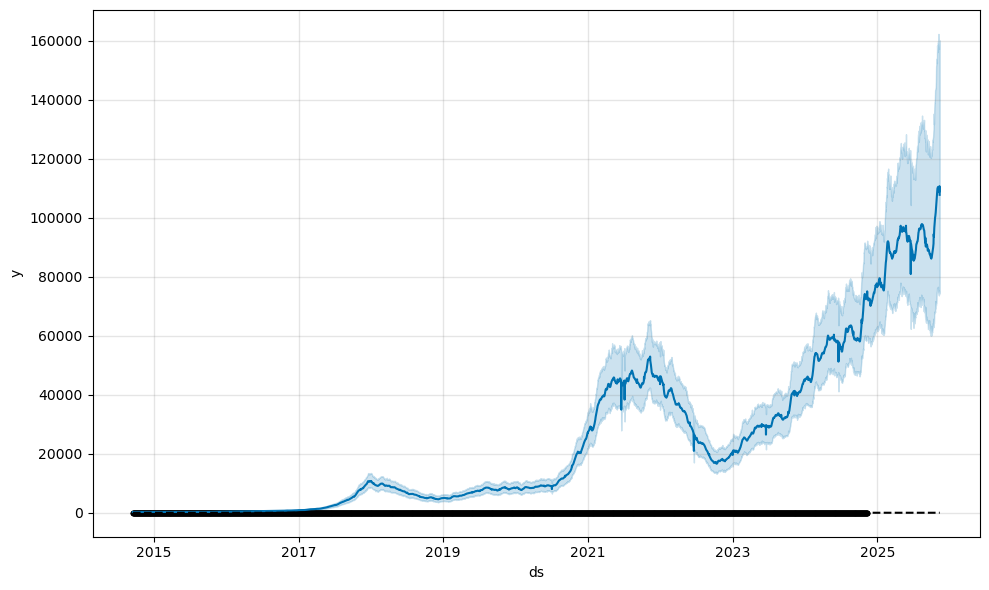

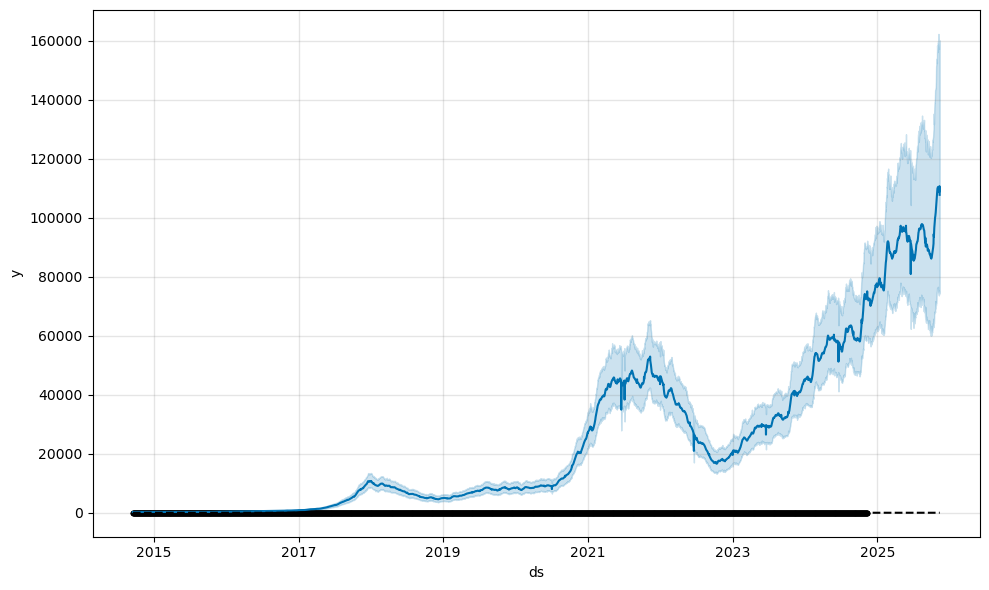

In [54]:
model.plot(forecast)